## Flujo paralelo sobre placas planas

In [2]:
#!pip install quantities
#!pip install uncertainties
#!pip install 'pycse==2.0.1'
#!pip install numpy
#!#pip install pandas
#!pip install matplotlib
#!pip install scipy
#!pip install jupyter_contrib_nbextensions
#!pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master

El problema hidrodinámico de la capa límite se reduce a resolver una ecuación diferencial ordinaria de tercer orden nolineal

$$2 \dfrac{d^3 f}{d \eta ^3} +  f \dfrac{d^2 f}{d \eta^2} $$

$$f'''+ \dfrac{1}{2} f f''=0$$

Las condiciones de frontera en términos de variables de similitud son

$$\dfrac{df}{d \eta} |_{\eta=0} = f(0)= 0,$$
$$\qquad  \qquad \dfrac{df}{d\eta} |_{\eta=\infty}  = 1$$

La solución de la ecuación (1) con las condiciones de frontera mencionadas, se obtiene mediante una expansión en serie o por integración numérica. En lo que sigue se muestran las funciones de capa límite para una placa plana.

En lo que sigue convertimos estas ecuaciones a un sistema de ecuaciones diferenciales de primer orden 

$$f_1=f$$
$$f_2=f_1'$$
$$f_3=f_2'$$
$$f_3'=- \dfrac{1}{2} f_1f_3'$$






In [3]:
from pycse import bvp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None, "display.max_columns", None)

%config Completer.use_jedi = False

In [9]:
def odefun(F, x):
    f1, f2, f3 = F.T
    return np.column_stack([f2,f3,-0.5 * f1 * f3])

def bcfun(Y):
    fa, fb = Y[0, :], Y[-1, :]
    return [fa[0],      # f1(0) =  0
            fa[1],  # f2(0) = 0
             1- fb[1]]  # f2(inf) = 1

#eta = np.arange(0,8,0.45)
#eta = np.linspace(0,7,300)
eta = np.arange(0,7,0.01)
f1init = eta
f2init = np.exp(-eta)
f3init = np.exp(-eta)

Finit = np.column_stack([f1init, f2init, f3init])

sol = bvp(odefun, bcfun, eta, Finit) #boundary value problem
f1, f2, f3 = sol.T

bs = pd.DataFrame(data={"n": np.round(eta,4), "f": np.round(f1,3), "dfdn": np.round(f2,4),"dfdn2": np.round(f3,3)})
bs


,n,f,dfdn,dfdn2
0,0.00,0.000,0.0000,0.332
1,0.01,0.000,0.0033,0.332
2,0.02,0.000,0.0066,0.332
3,0.03,0.000,0.0100,0.332
4,0.04,0.000,0.0133,0.332
5,0.05,0.000,0.0166,0.332
6,0.06,0.001,0.0199,0.332
7,0.07,0.001,0.0232,0.332
8,0.08,0.001,0.0266,0.332
9,0.09,0.001,0.0299,0.332


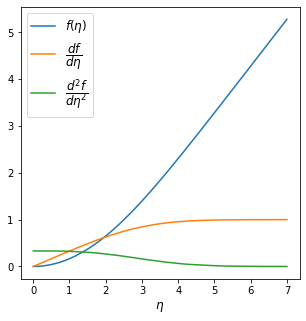

In [7]:
plt.figure(figsize=(5,5))
fig = plt.subplot()
fig.plot(bs.n,bs.f, label = '$f(\eta)$')
fig.plot(bs.n,bs.dfdn, label = "$\dfrac{df}{d \eta}$")
fig.plot(bs.n,bs.dfdn2, label = "$\dfrac{d^2f}{d \eta^2}$")
fig.plot()
plt.legend(fontsize=12)
plt.xlabel('$\eta$',fontsize=12)
plt.show()